In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
raw = pd.read_csv("data_sets/Books_Raw.csv") # From Niek
clean = pd.read_csv("data_sets/CleanDataSet.csv") # From the previous team
GB10k = pd.read_csv("data_sets/GoodBooks-10k.csv") # From the world wide web

In [2]:
start_time = time.time()
reviews = pd.read_csv("data_sets/Reviews_Raw.csv") # From Niek
end_time = time.time()
print("Import time:", end_time - start_time, "seconds")

Import time: 20.250831604003906 seconds


## Basic Stuff

In [5]:
reviews["review/text"].head()

0    This is only for Julie Strain fans. It's a col...
1    I don't care much for Dr. Seuss but after read...
2    If people become the books they read and if "t...
3    Theodore Seuss Geisel (1904-1991), aka &quot;D...
4    Philip Nel - Dr. Seuss: American IconThis is b...
Name: review/text, dtype: object

In [6]:
print(clean.count())
print(len(clean))

title             211704
description       211704
authors           211704
imageLink         159693
previewLink       187644
publishingDate    186075
categories        211704
isbn              162032
states            211704
dtype: int64
211704


In [8]:
print(raw.count())
print(len(raw))

Title            212403
description      143962
authors          180991
image            160329
previewLink      188568
publisher        136518
publishedDate    187099
infoLink         188568
categories       171205
ratingsCount      49752
dtype: int64
212404


In [9]:
# A book without a title
raw[raw["Title"].isnull()]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1066,NaN,NaN,['Maharshi Ramana'],http://books.google.com/books/content?id=uq0uj...,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,2015-12-15,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,1.0


In [8]:
print(GB10k.count())
print(len(GB10k))

id                           10000
book_id                      10000
best_book_id                 10000
work_id                      10000
books_count                  10000
isbn                          9300
isbn13                        9415
authors                      10000
original_publication_year     9979
original_title                9415
title                        10000
language_code                 8916
average_rating               10000
ratings_count                10000
work_ratings_count           10000
work_text_reviews_count      10000
ratings_1                    10000
ratings_2                    10000
ratings_3                    10000
ratings_4                    10000
ratings_5                    10000
image_url                    10000
small_image_url              10000
dtype: int64
10000


## Explore the categories present in both tables

In [9]:
print(raw["categories"].value_counts())
print(clean["categories"].value_counts())

categories
['Fiction']                               23419
['Religion']                               9459
['History']                                9330
['Juvenile Fiction']                       6643
['Biography & Autobiography']              6324
                                          ...  
['Authors, Japanese']                         1
['Birth certificates']                        1
['Restaurant management']                     1
['Oxford (England)']                          1
['Flame in the wind (Motion picture)']        1
Name: count, Length: 10883, dtype: int64
categories
Uncategorized             41263
Fiction                   23288
Religion                   9366
History                    9333
Juvenile Fiction           6616
                          ...  
Maya calendar                 1
Gay couples                   1
Astronomy in the Bible        1
Infill housing                1
Track and field               1
Name: count, Length: 10526, dtype: int64


In [10]:
"other" in raw["categories"]

False

In [11]:
print(any(cat == "['Authors, Japanese']" for cat in raw["categories"]))
print(any(cat == "Authors, Japanese" for cat in clean["categories"]))

True
True


In [12]:
tally_clean = clean["categories"].value_counts()
tally_clean[tally_clean==1].count()/tally_clean.count() # Just over half of the categories have only 1 entry

0.5682120463613909

In [13]:
tally_raw = raw["categories"].value_counts()
tally_raw[tally_raw==1].count()/tally_raw.count() # Just over half of the categories have only 1 entry

0.6004778094275476

In [14]:
tally = clean["categories"].value_counts()
tally[tally>20] 
tally.head(10)

categories
Uncategorized                41263
Fiction                      23288
Religion                      9366
History                       9333
Juvenile Fiction              6616
Biography & Autobiography     6289
Business & Economics          5597
Computers                     4291
Social Science                3813
Juvenile Nonfiction           3407
Name: count, dtype: int64

In [16]:
ss=clean["categories"].iloc[3]
print(ss)
print(ss == "Fiction")
print("Fiction" in clean["categories"]) # Dit is 
print(any(cat == "Fiction" for cat in clean["categories"])) # Totally unclear why this would be different from the above

clean[clean["categories"]=="Fiction"]

Fiction
True
False
True


,title,description,authors,imageLink,previewLink,publishingDate,categories,isbn,states
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,2005-02-23 00:00:00,Fiction,9.780595e+12,NIEUW
24,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,2001-03-06 00:00:00,Fiction,9.781583e+12,NIEUW
49,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,1997-04-23 00:00:00,Fiction,9.780373e+12,NIEUW
52,Anna Karenina. (Lernmaterialien),"De 16-jarige vrienden Red (ik-figuur), Leo, Ro...",['Cara Delevingne'],NaN,http://books.google.nl/books?id=o0kqtAEACAAJ&d...,2017-11-10 00:00:00,Fiction,9.789403e+12,NIEUW
53,Seance,"Mysterieus, duister en passioneel Londen, 19de...",['Kevin Valgaeren'],http://books.google.com/books/content?id=BiOTC...,http://books.google.nl/books?id=BiOTCwAAQBAJ&p...,2016-02-13 00:00:00,Fiction,9.789401e+12,NIEUW
...,...,...,...,...,...,...,...,...,...
211670,The Webster Chronicle,When a modern New England town is wracked by a...,['Daniel Akst'],http://books.google.com/books/content?id=0lQnr...,http://books.google.com/books?id=0lQnrPggGXcC&...,2002-12-23 00:00:00,Fiction,9.780425e+12,NIEUW
211675,The Disappearance of Sherlock Holmes (Sherlock...,Learning that a presumed-dead killer is alive ...,['Larry Millett'],http://books.google.com/books/content?id=ucG97...,http://books.google.com/books?id=ucG97e3rSewC&...,2002-04-23 00:00:00,Fiction,9.780670e+12,NIEUW
211696,"Picture of Guilt, A (Ellie Foreman Mysteries)",Geen beschrijving,['Libby Fischer Hellmann'],http://books.google.com/books/content?id=scAeD...,http://books.google.com/books?id=scAeDQAAQBAJ&...,2016-09-22 00:00:00,Fiction,9.781939e+12,NIEUW
211700,Daring To Dream,"In the first novel of the Dream Trilogy, Nora ...",['Nora Roberts'],http://books.google.com/books/content?id=TbSMD...,http://books.google.com/books?id=TbSMDQAAQBAJ&...,2012-04-23 00:00:00,Fiction,9.780425e+12,NIEUW


In [17]:
"Fiction" in clean["categories"][:4]

False

In [18]:
print(any(cat == "missing" for cat in clean["categories"]))

False


In [19]:
# Example data. NB: this does not work for string!!
data = pd.Series([1, 2, 3, 4])

# Check if value is present
value = 2

value in data

True

## Unique Titles?

In [20]:
clean["title"].value_counts() 

title
Wallace Stevens : Collected Poetry and Prose (Library of America)                                                                         2
Break a Leg!: The Kid's Guide to Acting and Stagecraft                                                                                    2
Indra's Pearls: The Vision of Felix Klein                                                                                                 2
Golden fleece;: The story of Franz Joseph & Elisabeth of Austria,                                                                         2
Peterson's the Minority Career Guide: What African Americans, Hispanics, and Asian Americans Must Know to Succeed in Corporate America    2
                                                                                                                                         ..
New Essays on Call It Sleep (The American Novel)                                                                                          1
Treatment Guid

In [21]:
raw["Title"].value_counts()

Title
Its Only Art If Its Well Hung!                                                                1
CAUGHT IN THE NET                                                                             1
Halo 2: The Official Game Guide                                                               1
The Black Prince                                                                              1
Happy Birthday, Biscuit!                                                                      1
                                                                                             ..
When Dinosaurs Go to School                                                                   1
Busted! (Sweet Valley University(R))                                                          1
Seismic Isolation for Earthquake Resistant Structures (Advances in Earthquake Engineering)    1
Mel Bay Presents Complete Book of Wedding Music for Flute or Violin                           1
Student's Solutions Manual for Joh

## ISBNs in Clean

In [22]:
# These are floats
clean["isbn"]

0         9.781883e+12
1         9.780826e+12
2         9.780830e+12
3         9.780595e+12
4         9.789766e+12
              ...     
211699    9.781561e+12
211700    9.780425e+12
211701    9.781566e+12
211702    9.780672e+12
211703    9.780575e+12
Name: isbn, Length: 211704, dtype: float64

In [23]:
# Make them into integers
clean["isbn_int"] = clean["isbn"].astype('Int64')

In [24]:
clean["isbn_length"]  = clean["isbn_int"].astype(str).apply(len)

In [25]:
clean[type(clean["isbn_int"]) == type(clean["isbn_int"].iloc[1])]

KeyError: False

In [26]:
def my_len(my_int):
    if pd.isna(my_int):
        return my_int
    else:
        return my_int.astype(str).apply(len)

clean["isbn_my_length"]  = clean["isbn_int"].apply(my_len)

AttributeError: 'float' object has no attribute 'astype'

In [27]:
clean[clean["isbn_length"]==4]

,title,description,authors,imageLink,previewLink,publishingDate,categories,isbn,states,isbn_int,isbn_length
6,The Overbury affair (Avon),Geen beschrijving,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,1960-04-23 00:00:00,Uncategorized,NaN,NIEUW,<NA>,4
7,A Walk in the Woods: a Play in Two Acts,Geen beschrijving,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,1988-04-23 00:00:00,Uncategorized,NaN,NIEUW,<NA>,4
15,Gold and greenstone,Sally did most things better than men but it w...,['Barry Crump'],NaN,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,2009-04-23 00:00:00,New Zealand fiction,NaN,NIEUW,<NA>,4
27,"Thomas Jefferson, (American statesmen)",Geen beschrijving,['John T. Morse'],NaN,http://books.google.nl/books?id=5YNDzwEACAAJ&d...,1888-04-23 00:00:00,Uncategorized,NaN,NIEUW,<NA>,4
34,Treat yourself to life,Geen beschrijving,['Raymond Charles Barker'],http://books.google.com/books/content?id=Q6Tkg...,http://books.google.nl/books?id=Q6Tkg70-rlEC&q...,1954-04-23 00:00:00,New Thought,NaN,NIEUW,<NA>,4
...,...,...,...,...,...,...,...,...,...,...,...
211656,"Is it hard?, Is it easy?",Aims to develop children's awareness of each i...,['Mary McBurney Green'],NaN,http://books.google.com/books?id=pif7LQEACAAJ&...,1967-04-23 00:00:00,Child development,NaN,NIEUW,<NA>,4
211663,Picture-Perfect Science Lessons: Using Childre...,Geen beschrijving,['No Author'],http://books.google.com/books/content?id=BtEPA...,http://books.google.com/books?id=BtEPAQAAMAAJ&...,2005-04-23 00:00:00,Children's libraries,NaN,NIEUW,<NA>,4
211665,Track and field omnibook,Geen beschrijving,['Ken Doherty'],http://books.google.com/books/content?id=bnRYA...,http://books.google.com/books?id=bnRYAAAAYAAJ&...,1971-04-23 00:00:00,Track and field,NaN,NIEUW,<NA>,4
211689,Speed Japanese: 4 One Hour Multi-Track CDs,Geen beschrijving,['No Author'],http://books.google.com/books/content?id=olpbA...,http://books.google.com/books?id=olpbAAAAMAAJ&...,2006-04-23 00:00:00,Popular music,NaN,NIEUW,<NA>,4


In [28]:
# Pandas has its own way of implementing missing values?
isbn_nan = clean["isbn"].iloc[6]
print(isbn_nan)
print(pd.isna(isbn_nan))
print(isbn_nan == None)
print(isbn_nan == np.nan)
print(isbn_nan is None)

nan
True
False
False
False


## Titles in review data

In [29]:
book_titles = reviews["Title"].value_counts()

In [30]:
reviews.head(1)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


In [31]:
## Took 22 mins to run this cell

start_time = time.time()
vals = []
for title in book_titles.index:
    present = any(Title == title for Title in raw["Title"])
    vals.append(present)
end_time = time.time()
print("Import time:", end_time - start_time, "seconds")

Import time: 1857.2893495559692 seconds


In [37]:
np.prod(vals)

1

In [33]:
# ALL TITLES IN THE REVIEWS DATABASE ARE IN THE BOOK DATA BASE

## Understand difference between User_id and profileName

In [22]:
print("Number of unique User_id's", reviews["User_id"].nunique())
print("Number of unique profileNames: ", reviews["profileName"].nunique())

Number of unique User_id's 1008972
Number of unique profileNames:  854145


In [23]:
result = reviews.groupby('User_id')['profileName'].nunique() == 1

count = 0
for key, value in result.items():
    if not value:
        count += 1
print("Number of user_id's with multiple profileName: ", count)

Number of user_id's with multiple profileName:  461


In [24]:
result = reviews.groupby('profileName')['User_id'].nunique() == 1

count = 0
for key, value in result.items():
    if not value:
        count += 1
        # print(key)
print("Number of profileNames with multiple User_id: ", count)

Number of profileNames with multiple User_id:  38464


In [25]:
missing_id_and_name = reviews[(reviews['User_id'].isnull()) * (reviews['profileName'].isnull())]
print("Number of users without user_id and without profileName: ", len(missing_id_and_name))

Number of users without user_id and without profileName:  561787


In [27]:
reviews[reviews["profileName"]=="A 10-year old reader"].head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
65142,B0007K33F2,"Monte Cristo,",NaN,A2F5PZPU3B2E27,A 10-year old reader,0/0,5.0,999734400,"Truly, A Masterpiece",The Count of Monte Cristo is touching story ab...
79185,0606035826,Garden of Shadows (Dollanganger Series),NaN,AFXT6PPW1ZTQA,A 10-year old reader,7/14,1.0,1007769600,This story line is getting really really reall...,I loved FLOWERS IN THE ATTIC. PETALS ON THE WI...
88237,B000NWU3I4,"The Hobbitt, or there and back again; illustra...",NaN,A1H4K5YVQ76MVW,A 10-year old reader,0/0,5.0,999388800,A wild adventure with some wild friends,This book takes you on a magical adventure and...
98357,B0001BJEF0,So You Want to Be a Wizard: Young Wizard Serie...,NaN,A35TGFHPGFYLI4,A 10-year old reader,1/2,4.0,1015027200,So You Want to Be a Wizard,I thought that this book was a very good book....
153357,0440228840,Demon in My View (Den of Shadows),6.99,A31Q3B4HVHA5ZY,A 10-year old reader,0/0,3.0,999561600,Demon in My View,"I love this book, the one person I like was, A..."


In [26]:
temp_dat = reviews[['User_id', "profileName"]]
count = 0
for index, row in temp_dat.iterrows():
    vals = row.values
    if vals[0] == None and vals[1] != None:
        count +=1
print(count)
print("There are no review without a User_id that do have a profileName")

0
There are no review without a User_id that do have a profileName


HYPOTHESIS: The profile name is the screen name appearing. Many submission may have come with the same User_ID. Multiple Profile Names per user_ID are due to accounts changing names. Let's not look at the "ProfileName" category too much.

## The id column in reviews is a subset of title. Perhaps it's an edition??

In [21]:
reviews_without_titles = reviews.dropna(subset="Title")

unique_titles_per_id = reviews_without_titles.groupby('Id')['Title'].nunique()

# THIS SHOWS THAT ALL REVIEWS WITH THE SAME ID HAVE THE SAME TITLE
np.prod(unique_titles_per_id == 1)

1

# Review times analysis

In [5]:
times = reviews["review/time"]

In [10]:
times.describe()

count    3.000000e+06
mean     1.132307e+09
std      1.493202e+08
min     -1.000000e+00
25%      9.999072e+08
50%      1.128298e+09
75%      1.269130e+09
max      1.362355e+09
Name: review/time, dtype: float64

In [14]:
times.sort_values()

2971452            -1
2971449            -1
2971448            -1
2971447            -1
2971446            -1
              ...    
2846063    1362355200
310909     1362355200
203132     1362355200
2389710    1362355200
788484     1362355200
Name: review/time, Length: 3000000, dtype: int64

In [29]:
# Count instances of -1
count_minus_one = (times == -1).sum()
print(count_minus_one)

# Remove instances of -1
times_without_minus_one = times[times != -1]
times_in_years = times_without_minus_one / 356 / 24/ 3600

21


In [31]:
print("min in years:", times_in_years.min())
print("max in years:", times_in_years.max())

min in years: 26.1376404494382
max in years: 44.29213483146068


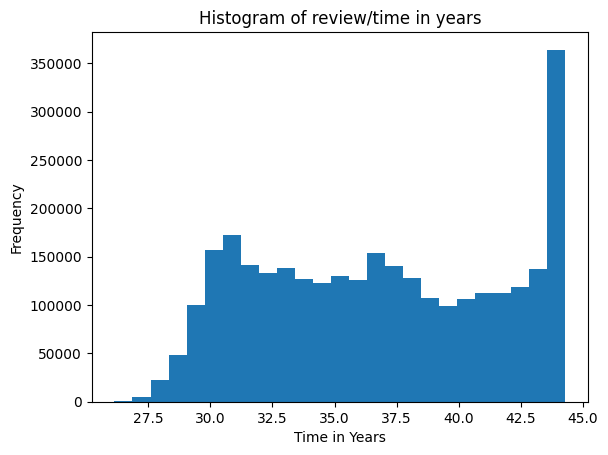

In [35]:
plt.hist(times_in_years, bins=25)  # Adjust the number of bins as needed
plt.xlabel('Time in Years')
plt.ylabel('Frequency')
plt.title('Histogram of review/time in years')
plt.show()

## Title, user_id pairs in reviews: a disaster

In [4]:
# Group the reviews by title and User_id and count if there are multiple entries
unique_counts = reviews.groupby(['Title', 'User_id']).size()#.reset_index(name='count')
duplicate_reviews = unique_counts[unique_counts > 1]
print("Number of duplicated reviews:", duplicate_reviews.sum())
print("Number of book-user pairs that have duplicates:", duplicate_reviews.count())

Number of duplicated reviews: 505807
Number of book-user pairs that have duplicates: 183600


In [30]:
# An example: Only the Id's are different!
example = reviews[(reviews['User_id'] == "A0015610VMNR0JC9XVL1") & (reviews['Title'] == "The richest man in Babylon")]
example

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1483705,B0007G66WI,The richest man in Babylon,NaN,A0015610VMNR0JC9XVL1,ivan kaye,0/0,5.0,1358985600,best book to show you how to grow wealth!,best book to show you how to grow wealth! Have...
2639269,B0007DRIT6,The richest man in Babylon,NaN,A0015610VMNR0JC9XVL1,ivan kaye,0/0,5.0,1358985600,best book to show you how to grow wealth!,best book to show you how to grow wealth! Have...
2839481,B0000CJ9GZ,The richest man in Babylon,NaN,A0015610VMNR0JC9XVL1,ivan kaye,0/0,5.0,1358985600,best book to show you how to grow wealth!,best book to show you how to grow wealth! Have...


In [7]:
print(duplicate_reviews.sort_values(ascending=False).head(3))

Title                User_id       
Pride and Prejudice  A1D2C0WDCSHUWZ    131
Persuasion           A1D2C0WDCSHUWZ    130
Wuthering Heights    ACPAI5CVQKKWK     110
dtype: int64


In [9]:
# Let's find this user with 131 reviews for Pride and Prejudice
pap_fan = reviews[(reviews["Title"] =='Pride and Prejudice') & (reviews["User_id"] == "A1D2C0WDCSHUWZ")]
print(pap_fan["Id"].nunique())
print(pap_fan["Price"].nunique())
print(pap_fan["review/score"].nunique())
print(pap_fan["review/helpfulness"].nunique())
print(pap_fan["review/summary"].nunique())
print(pap_fan["review/time"].nunique())
print(pap_fan["review/text"].nunique())
pap_fan.loc[399081]["review/text"]

10
0
1
6
3
13
1


'"Pride and Prejudice" is undoubtedly one of the most beloved classic novels in history -- it\'s had countless adaptations, sequels and homages lavished on it over the years.And Jane Austen\'s grand opus is still beloved for a good reason. While it\'s rather stuffily written much of the time, it has a vibrant core of witty dialogue and strong characters that shine like lanterns in the night -- and the best part of it is the interplay between the two strong-willed main characters, whose initial dislike of one another blossoms into love once they learn how to overcome his pride and her prejudice.The Bennett family is in an uproar when wealthy Mr. Bingley moves into the neighborhood, and Mrs. Bennett is especially happy when he takes a liking to the eldest Bennett daughter Jane -- since their estate is entailed and there is no Mr. Bennett Jr., a good marriage is considered essential for at least one of the girls. But her forthright, independent sister Lizzie immediately butts heads with w

In [10]:
grouping = reviews.groupby(['Title', 'User_id'])

unique_text_counts = []
unique_score_counts = []
unique_price_counts = []
duplicate_score_pairs = []

for (group_title, group_user), group_df in grouping:
    duplicates_exist = len(group_df) > 1 #only select those Title - user pairs with multiple entries
    if duplicates_exist:
        text_count = group_df["review/text"].nunique()
        score_count = group_df["review/score"].nunique()
        price_count = group_df["Price"].nunique()
        unique_text_counts.append(text_count)
        unique_score_counts.append(score_count)
        unique_price_counts.append(price_count)
        if score_count > 1:
            duplicate_score_pairs.append((group_title, group_user))

In [14]:
print("Number of (title, user_id) pairs that have different score values:", len(duplicate_score_pairs))

Number of (title, user_id) pairs that have different score values: 2482


In [12]:
reviews[(reviews["Title"] == "(ESV) English Standard Version Large Print Bible. Premium Bonded Leather, Black, Red Letter Text (English Language)") & (reviews["User_id"] == "A19LU4NTDINGMD")]

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
69863,1581346581,(ESV) English Standard Version Large Print Bib...,NaN,A19LU4NTDINGMD,Marcus,44/47,3.0,1104883200,"Excellent translation, Crossway poor quality u...",I received my copy of the Crossway Heirloom Re...
69864,1581346581,(ESV) English Standard Version Large Print Bib...,NaN,A19LU4NTDINGMD,Marcus,47/51,2.0,1171324800,"A good idea, gone Crossway",I love the single column verse format layout o...


In [13]:
# At least this is clean
reviews["review/score"].value_counts()

review/score
5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64